<a href="https://colab.research.google.com/github/darshan-k3/Low-Complexity-Deepfake-Detection-Model/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

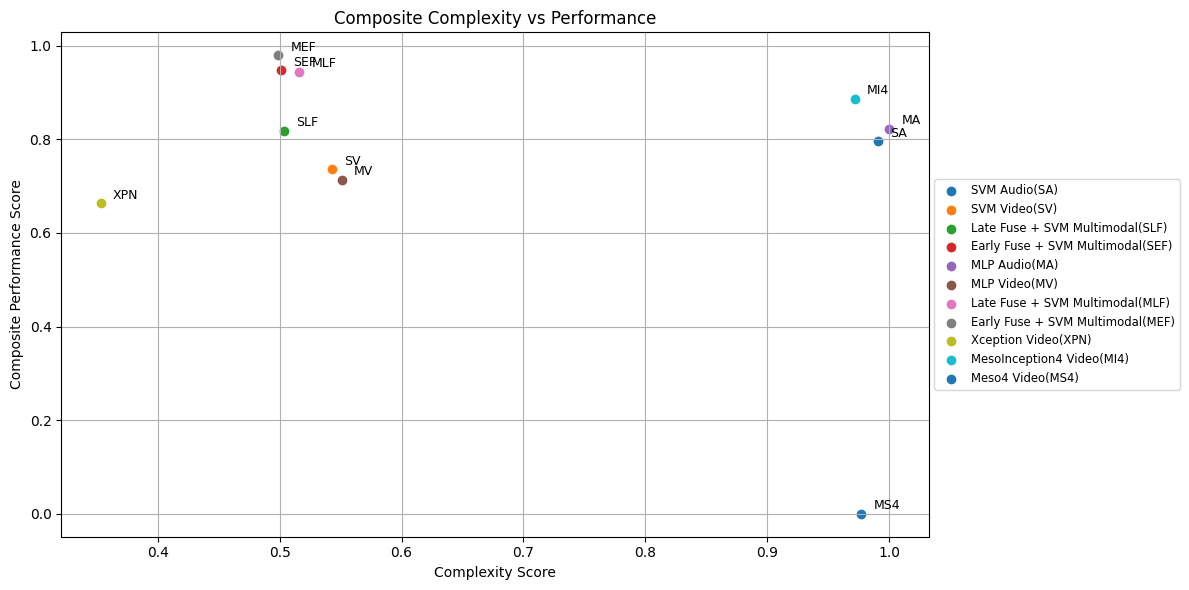

(None,
    Model  Complexity Score  Performance Score
 0     SA          0.990967           0.795786
 1     SV          0.543181           0.735847
 2    SLF          0.503703           0.817725
 3    SEF          0.501083           0.947053
 4     MA          1.000000           0.822387
 5     MV          0.550708           0.713010
 6    MLF          0.516071           0.944054
 7    MEF          0.498822           0.979558
 8    XPN          0.353151           0.663014
 9    MI4          0.971925           0.887061
 10   MS4          0.977278           0.000000)

In [3]:
# Author: 21004275
# This script processes a dataset of machine learning model performances and visualizes their complexity vs. performance.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Initialise dataset with model performance metrics.
data = {
    "Model":             ["SA", "SV", "SLF", "SEF", "MA", "MV", "MLF", "MEF", "XPN", "MI4", "MS4"],
    "Memory Usage (kB)": [78.81, 700.64, 789.21, 419.40, 73.71, 243.20, 316.91, 265.72, 81597.92, 108.35, 100.14],
    "Time Spent (s)":    [14.52, 175.30, 189.40, 191.17, 11.26, 173.59, 185.97, 192.33, 64.44, 21.35, 19.43],
    "Accuracy (%)":      [79.37, 76.88, 78.12, 86.25, 77.50, 76.88, 85.00, 88.75, 74.51, 87.32, 50.32],
    "AUC-ROC":           [79.89, 74.45, 82.84, 91.98, 85.96, 70.18, 92.42, 94.66, 83.31, 87.32, 50.32],
    "F2 Score":          [92.48, 92.88, 94.14, 92.59, 92.04, 94.33, 93.30 ,91.13, 74.27, 87.23, 42.15]
}

# Extended model names for labeling.
model_labels = [
    "SVM Audio", "SVM Video", "Late Fuse + SVM Multimodal", "Early Fuse + SVM Multimodal",
    "MLP Audio", "MLP Video", "Late Fuse + SVM Multimodal", "Early Fuse + SVM Multimodal", "Xception Video",
    "MesoInception4 Video", "Meso4 Video"
]

df = pd.DataFrame(data)

# Preparing data for visualisation: normalisation and computation of performance and complexity scores.
df_transformed = df[['Memory Usage (kB)', 'Time Spent (s)', 'Accuracy (%)', 'AUC-ROC', 'F2 Score']]
scaler = MinMaxScaler()
df_normalised = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)
df_normalised['Performance Score'] = df_normalised[['Accuracy (%)', 'AUC-ROC', 'F2 Score']].mean(axis=1)
df_normalised['Complexity Score'] = 1 - df_normalised[['Memory Usage (kB)', 'Time Spent (s)']].mean(axis=1)
df_normalised['Model'] = df['Model']

# Visualising the relationship between model complexity and performance.
plt.figure(figsize=(12, 6))
x_offset, y_offset = 0.01, 0.01  # For text annotation positioning.

for index, row in df_normalised.iterrows():
    plt.scatter(row['Complexity Score'], row['Performance Score'], label=model_labels[index] + "(" + row['Model'] + ")")
    plt.text(row['Complexity Score'] + x_offset, row['Performance Score'] + y_offset, row['Model'], fontsize=9)

plt.xlabel('Complexity Score')
plt.ylabel('Composite Performance Score')
plt.title('Composite Complexity vs Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show(), df_normalised[['Model', 'Complexity Score', 'Performance Score']]


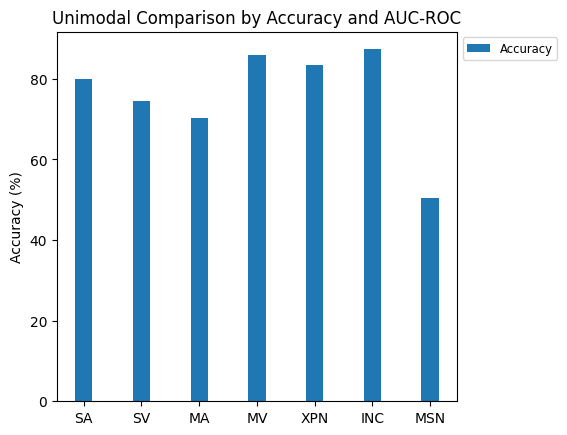

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of models to include in the new dataset
selected_models = ["SA", "SV", "MA", "MV","XPN", "INC", "MSN"]

# Filter the original DataFrame
new_df = df[df['Model'].isin(selected_models)]



models = new_df['Model']
accuracy = new_df['Accuracy (%)']
roc_auc = new_df['AUC-ROC']
# f2_score = df['F2 Score']



x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, roc_auc, width, label='Accuracy')
# rects3 = ax.bar(x + width , f2_score, width, label='F2 Score')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Unimodal Comparison by Accuracy and AUC-ROC')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.subplots_adjust(right=0.75)  # Adjust subplot to make room for the legend

plt.show()


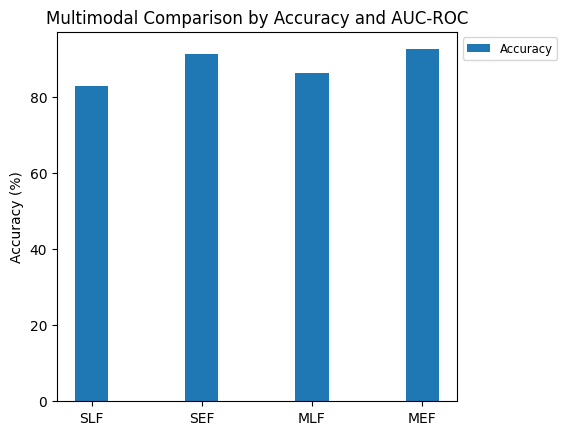

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of models to include in the new dataset
selected_models = ["MEF", "MLF", "SEF", "SLF"]

# Filter the original DataFrame
new_df = df[df['Model'].isin(selected_models)]



models = new_df['Model']
accuracy = new_df['Accuracy (%)']
roc_auc = new_df['AUC-ROC']
# f2_score = df['F2 Score']



x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, roc_auc, width, label='Accuracy')
# rects3 = ax.bar(x + width , f2_score, width, label='F2 Score')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Multimodal Comparison by Accuracy and AUC-ROC')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.subplots_adjust(right=0.75)  # Adjust subplot to make room for the legend

plt.show()


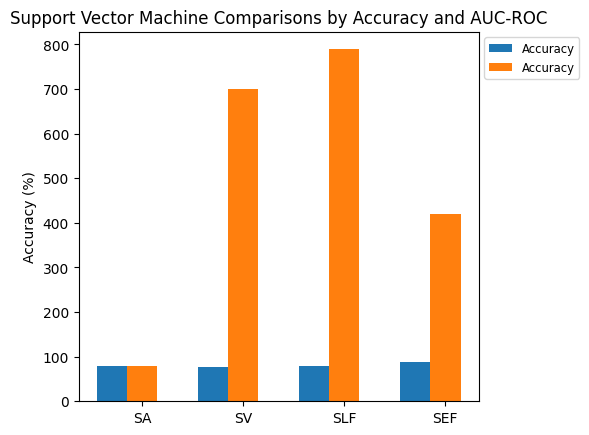

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of models to include in the new dataset
selected_models = ["SEF", "SLF", "SA", "SV"]

# Filter the original DataFrame
new_df = df[df['Model'].isin(selected_models)]


models = new_df['Model']
accuracy = new_df['Accuracy (%)']
mem_us = new_df['Memory Usage (kB)']
# f2_score = df['F2 Score']



x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, mem_us, width, label='Accuracy')
# rects3 = ax.bar(x + width , f2_score, width, label='F2 Score')

ax.set_ylabel('Accuracy (%)')
ax.set_title('Support Vector Machine Comparisons by Accuracy and AUC-ROC')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.subplots_adjust(right=0.75)  # Adjust subplot to make room for the legend

plt.show()


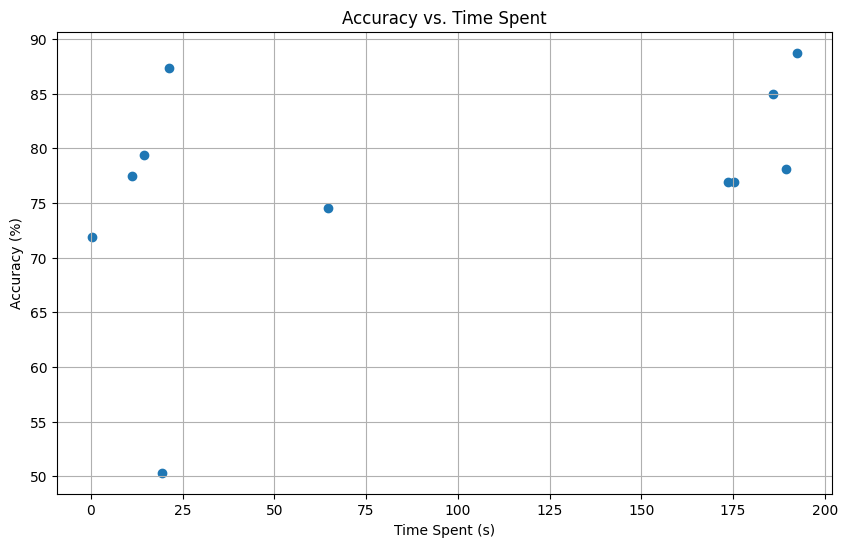

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data.

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(df['Time Spent (s)'], df['Accuracy (%)'])  # Plot Time Spent vs. Accuracy

# Adding labels and title for clarity
plt.xlabel('Time Spent (s)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Time Spent')

# Optionally, add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


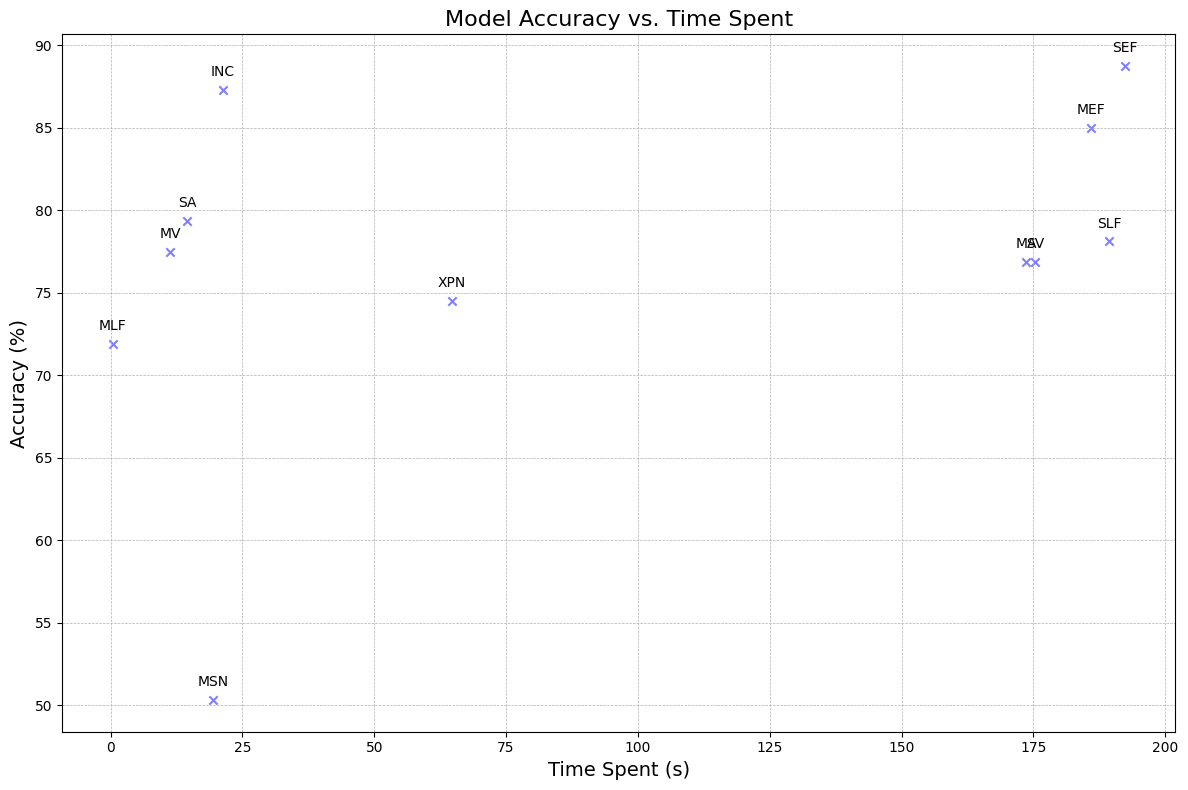

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has columns 'Time Spent (s)', 'Accuracy (%)', and 'Model'.

# Create the scatter plot
plt.figure(figsize=(12, 8))  # Creates a figure object with a specified size.
plt.scatter(df['Time Spent (s)'], df['Accuracy (%)'], color='blue', alpha=0.5, marker='x')  # Plots Time Spent vs. Accuracy as a scatter plot.

# Annotate each point with its model name
for i, model_name in enumerate(df['Model']):
    plt.annotate(model_name,  # The text to display
                 (df['Time Spent (s)'][i], df['Accuracy (%)'][i]),  # The point to annotate
                 textcoords="offset points",  # How to position the text
                 xytext=(0,10),  # Distance from text to points (x,y)
                 ha='center')  # Horizontal alignment can be left, right or center

# Adding labels and title for clarity
plt.xlabel('Time Spent (s)', fontsize=14)  # X-axis label
plt.ylabel('Accuracy (%)', fontsize=14)  # Y-axis label
plt.title('Model Accuracy vs. Time Spent', fontsize=16)  # Plot title

# Optionally, add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting margins and layout
plt.tight_layout()

# Show the plot
plt.show()
